In [1]:
from mini_model import *
import itertools

ACT-R connection has been started.


In [2]:
difficulty = [3,5,7]
payoff = [7,10,13]
params = list(itertools.product(*[difficulty, payoff]))

In [6]:
LOAD = True
if LOAD:
    df = pd.read_csv("./mini_model_df_20220421.txt")
else: 
    dfs = []
    for p in params:
        rs = simulation(epoch=100, time=100, param_set={'difficulty':p[0], 'payoff':p[1]})
        df = merge_simulation_data(rs)
        dfs.append(df)
    df = pd.concat(dfs)
    df.to_csv("./mini_model_df_20220421.txt", index=False)

==== SIMULATED ==== epoch >> 0
PARAMETERS:  {'difficulty': 3, 'payoff': 7}
==== SIMULATED ==== epoch >> 10
PARAMETERS:  {'difficulty': 3, 'payoff': 7}
==== SIMULATED ==== epoch >> 20
PARAMETERS:  {'difficulty': 3, 'payoff': 7}
==== SIMULATED ==== epoch >> 30
PARAMETERS:  {'difficulty': 3, 'payoff': 7}
==== SIMULATED ==== epoch >> 40
PARAMETERS:  {'difficulty': 3, 'payoff': 7}
==== SIMULATED ==== epoch >> 50
PARAMETERS:  {'difficulty': 3, 'payoff': 7}
==== SIMULATED ==== epoch >> 60
PARAMETERS:  {'difficulty': 3, 'payoff': 7}
==== SIMULATED ==== epoch >> 70
PARAMETERS:  {'difficulty': 3, 'payoff': 7}
==== SIMULATED ==== epoch >> 80
PARAMETERS:  {'difficulty': 3, 'payoff': 7}
==== SIMULATED ==== epoch >> 90
PARAMETERS:  {'difficulty': 3, 'payoff': 7}
==== SIMULATED ==== epoch >> 0
PARAMETERS:  {'difficulty': 3, 'payoff': 10}
==== SIMULATED ==== epoch >> 10
PARAMETERS:  {'difficulty': 3, 'payoff': 10}
==== SIMULATED ==== epoch >> 20
PARAMETERS:  {'difficulty': 3, 'payoff': 10}
==== SIMULA

In [30]:
df=df.iloc[natsort.index_humansorted(df.production)]
df.head()

,epoch,trial,production,response_time,firing_time,rewarded_time,delivered_reward,passed_time,received_reward,u,utility,at,difficulty,payoff
0,4,1,P1,0.12,0.065,0.065,0.332,0.015,0.317,0.1268,-0.763223,0.0151,3,7
0,16,1,P1,0.12,0.065,0.065,0.332,0.015,0.317,0.1268,-0.405670,0.0151,3,7
43,17,2,P1,0.12,0.293,0.293,0.332,0.015,0.317,0.1268,-0.478658,0.0151,3,7
0,19,1,P1,0.12,0.065,0.065,0.332,0.015,0.317,0.1268,1.109913,0.0151,3,7
0,21,1,P1,0.12,0.065,0.065,0.332,0.015,0.317,0.1268,-0.727738,0.0151,3,7


<AxesSubplot:xlabel='production', ylabel='perc'>

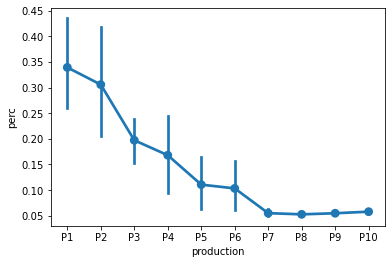

In [91]:
# order = ["P1", "P2","P3", "P4","P5","P6", "P7", "P8", "P9", "P10"]
# df_agg = df.groupby(["production", "difficulty", "payoff"])["trial"].agg(["count", "sum"]).reset_index()
# df_agg["perc"] = df_agg["count"]/df_agg["sum"]
# sns.pointplot(data=df_agg, x="production", y="perc", order=order)

In [28]:
def plot_actr_evc(df, subtitle=""):
    """in single plots"""
    order=["P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "P9", "P10"]
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    ax3 = ax.twinx()
    ax4 = ax.twinx()
    #sns.displot(x=df['production'], order=order, palette="Purples", ax=ax).set_title('EVC in ACT-R: {}'.format(subtitle))
    sns.histplot(x='production', hue="production", color="production", palette="Purples", ax=ax, data=df.iloc[natsort.index_humansorted(df.production)])#.set_title('EVC in ACT-R: {}'.format(subtitle))
    sns.pointplot(x="production", y="delivered_reward", data=df, order=order, palette="Reds", ax=ax2, label="reward")
    sns.pointplot(x="production", y="at", order=order, data=df, palette="Blues", ax=ax3, label="cost")
    sns.lineplot(x="production", y="u", color="purple", data=df.iloc[natsort.index_humansorted(df.production)], ax=ax4, label="utility")
    
    #ax2.set_yticks([])
    ax3.set_yticks([])
    ax4.set_yticks([])
    
    ax.set_ylabel("")
    ax2.set_ylabel("")
    ax3.set_ylabel("")
    ax4.set_ylabel("")
    '''
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines_3, labels_3 = ax3.get_legend_handles_labels()
    lines_4, labels_4 = ax4.get_legend_handles_labels()

    lines = lines_1 + lines_2 + lines_3 + lines_4
    labels = labels_1 + labels_2 + labels_3 + labels_4

    ax.legend(lines, labels, loc=0)
    #print(lines, labels)
    '''
    #fig.legend(loc=1)

    plt.show()

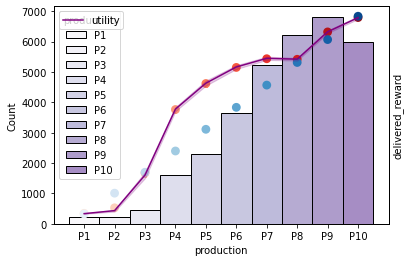

In [92]:
plot_actr_evc()